<a href="https://colab.research.google.com/github/marcelo7xy/Projeto_base_dados_jogos_mobile/blob/main/Cruzeiro_projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Criando gráficos com a base de dados de 2024 "jogos_mobile" que apresenta os nomes dos jogos, empresas, generos e ranking.

link: "https://www.kaggle.com/datasets/dem0nking/mobile-games-android-and-ios-rating-dataset"

#1º Gráfico

Exibe os Gêneros mais jogados, através do gráfico de barras.


In [258]:
#importando as bibliotecas pandas, para trabalhar com dados e matplotlib para gerar gráficos.

import pandas as pd
import matplotlib.pyplot as plt

In [259]:
#usando o comando head() para exibir as 5 primeiras linhas do dataset.

base = pd.read_csv("jogos_mobile.csv")
base.head()

,Game Name,Developer,Genre,Rating
0,Candy Crush Saga,King,Puzzle,4.6
1,Clash of Clans,Supercell,Strategy,4.5
2,Among Us,InnerSloth,Party,4.4
3,Pokémon GO,Niantic,Augmented Reality,4.3
4,PUBG Mobile,Tencent Games,Battle Royale,4.2


In [260]:
# partindo da coluna Genre filtrando por quantidade e criando coluna Quantidade.
empresas = base['Genre'].value_counts().reset_index(name='Quantidade').sort_values(by='Quantidade', ascending=False)
empresas_filtradas = empresas.query('Quantidade > 2')
empresas_filtradas

,Genre,Quantidade
0,Strategy,17
1,Simulation,14
2,Puzzle,13
3,Arcade,10
4,RPG,6
5,Racing,5
6,Action,5
7,Endless Runner,4
8,Sports,4
9,Battle Royale,3


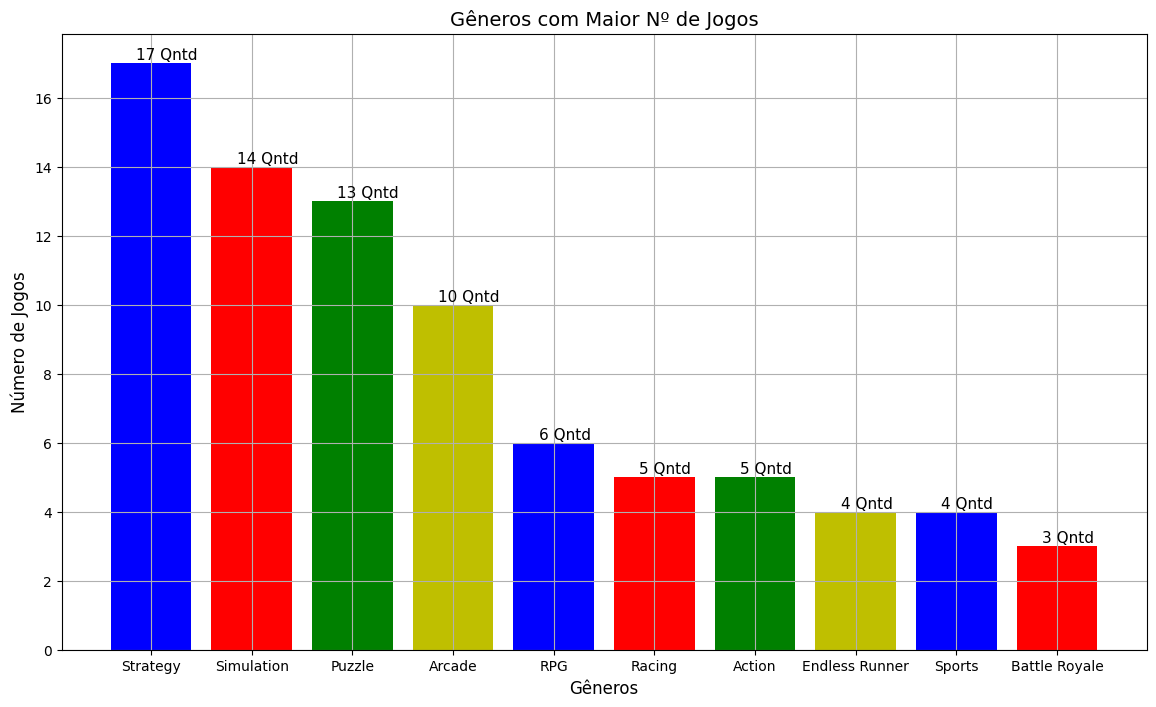

In [261]:
#gerando o gráfico com seus parâmetros.

labels = empresas_filtradas['Genre']
vals = empresas_filtradas['Quantidade']

fig, ax = plt.subplots(figsize=(14, 8))

ax.bar(labels, vals, color=['blue', 'red', 'green', 'y'])
plt.title('Gêneros com Maior Nº de Jogos', fontsize=14)

ax.set_xlabel('Gêneros', fontsize=12)
ax.set_ylabel('Número de Jogos', fontsize=12)

for idx, val in enumerate(vals):
  txt = f'{val} Qntd'
  y_coord = val + 0.1
  x_coord = idx - 0.15

  ax.text(x=x_coord, y=y_coord, s=txt, fontsize=11)

ax.grid()
plt.show()

#2º Gráfico

Exibe as empresas com o maior número de jogos, usando setores.

In [262]:
#usando o comando head() para exibir as 5 primeiras linhas do dataset.

base = pd.read_csv("jogos_mobile.csv")
base.head()

,Game Name,Developer,Genre,Rating
0,Candy Crush Saga,King,Puzzle,4.6
1,Clash of Clans,Supercell,Strategy,4.5
2,Among Us,InnerSloth,Party,4.4
3,Pokémon GO,Niantic,Augmented Reality,4.3
4,PUBG Mobile,Tencent Games,Battle Royale,4.2


In [263]:
# partindo da coluna Developer filtrando por quantidade e criando coluna Quantidade.
empresas = base['Developer'].value_counts().reset_index(name='Quantidade').sort_values(by='Quantidade', ascending=False)
empresas_filtradas = empresas.query('Quantidade > 2')
empresas_filtradas


,Developer,Quantidade
0,Supercell,5
1,Electronic Arts,4
2,Rovio Entertainment,3


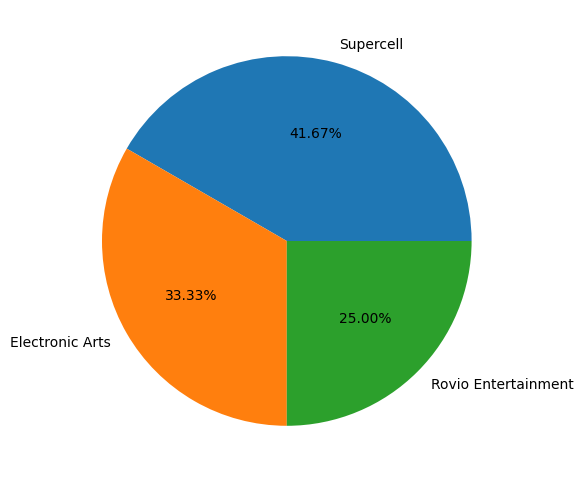

In [264]:
# criando o gráfico de setores com algumas indicações.
plt.figure(figsize=(8, 6))
plt.pie(empresas_filtradas['Quantidade'].values,
        labels=empresas_filtradas['Developer'],
        labeldistance=1.1,
        autopct='%.2f%%',
        pctdistance=0.6
        )

plt.show()

#3º Gráfico

Exibe gêneros de jogos criados por cada empresa.

In [293]:
# importando a biblioteca plotpy.
import plotly.express as px

In [294]:
# filtrando a partir das colunas Developer e Genre por quantidade.
empresas_treemap_filtradas = base[['Developer', 'Genre']].value_counts().reset_index(name='Quantidade').sort_values(by='Quantidade', ascending=False)
empresas_treemap_filtradas = empresas_treemap_filtradas[empresas_treemap_filtradas['Quantidade'] > 1]

empresas_treemap_filtradas

,Developer,Genre,Quantidade
0,Supercell,Strategy,3
6,IGG.COM,Strategy,2
10,Machine Zone,Strategy,2
9,NaturalMotion,Racing,2
8,Rovio Entertainment,Arcade,2
7,Electronic Arts,Simulation,2
1,miHoYo,Action RPG,2
5,First Touch Games,Sports,2
3,Playrix,Puzzle,2
2,King,Puzzle,2


In [297]:
# criando o gráfico Treemap.
genero = empresas_treemap_filtradas.Genre
empresa = empresas_treemap_filtradas.Developer
quantidade = empresas_treemap_filtradas.Quantidade
df = pd.DataFrame(dict(genero=genero,empresa=empresa,quantidade=quantidade))
df["all"] = "all" #garante um único nó raiz
fig = px.treemap(df,path=[genero,empresa],values=quantidade)
fig.show()
